# Comparison of model predictions over Perturb-seq (1-gene) data by _Adamson et al._[[1]](https://doi.org/10.1016/j.cell.2016.11.048) 


This notebook compares the performance of a `biolord` model to `GEARS`[[2]](https://doi.org/10.1101/2022.07.12.499735) in predictions over the Perturb-Seq dataset by _Adamson et al._[[1]](https://doi.org/10.1016/j.cell.2016.11.048) and compares its performance to 

Running this notebook requires running:
1. [`1_perturbations_adamson_preprocessing.ipynb`](https://github.com/nitzanlab/biolord_reproducibility/blob/main/notebooks/perturbations/adamson/1_perturbations_adamson_preprocessing.ipynb) which creates the `adata` objects, the normalization values and runs the `GEARS` comparison.
2. [`base_experiment_adamson.py`](https://github.com/nitzanlab/biolord_reproducibility/blob/main/scripts/biolord/adamson/base_experiment_adamson.py): set the flag `--optimal-params True` to use the reported configuration parameters.

[[1] Adamson, B., Norman, T. M., Jost, M., Cho, M. Y., Nuñez, J. K., Chen, Y., ... & Weissman, J. S. (2016). A multiplexed single-cell CRISPR screening platform enables systematic dissection of the unfolded protein response. Cell, 167(7), 1867-1882.](https://doi.org/10.1016/j.cell.2016.11.048)

[[2] Roohani, Y., Huang, K., & Leskovec, J. (2022). GEARS: Predicting transcriptional outcomes of novel multi-gene perturbations. BioRxiv, 2022-07.](https://doi.org/10.1101/2022.07.12.499735)



## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
sys.path.append("../../../")
sys.path.append("../../../utils/")
from paths import DATA_DIR, FIG_DIR

## Set parameters

In [4]:
import mplscience

mplscience.set_style()

plt.rcParams["legend.scatterpoints"] = 1

In [5]:
DATA_DIR_LCL = str(DATA_DIR) + "/perturbations/adamson/"
FIG_DIR_LCL = str(FIG_DIR) + "/perturbations/adamson/"

## Evaluate

In [6]:
gears_res = pd.read_csv(DATA_DIR_LCL + "gears_normalized_mse_de_seeds.csv", index_col=0).T

In [7]:
biolord_res = pd.read_csv(DATA_DIR_LCL + "biolord_normalized_mse_de_seeds.csv", index_col=0).T

In [8]:
df = pd.concat([biolord_res, gears_res], keys=['biolord', 'GEARS']).reset_index()
df = df.melt(id_vars=["level_0", "level_1"], value_vars=df.columns[2:])

In [9]:
test_set = {
    "unseen_single": "1 gene\n(1 unseen of 1)"
}
df = df.replace(test_set)

df = df.rename(columns={
    "level_0": "method",
    "level_a": "seed",
    "variable": "test set",
    "value": "MSE 20 de genes"
})

df = df[df["test set"].isin(list(test_set.values()))]

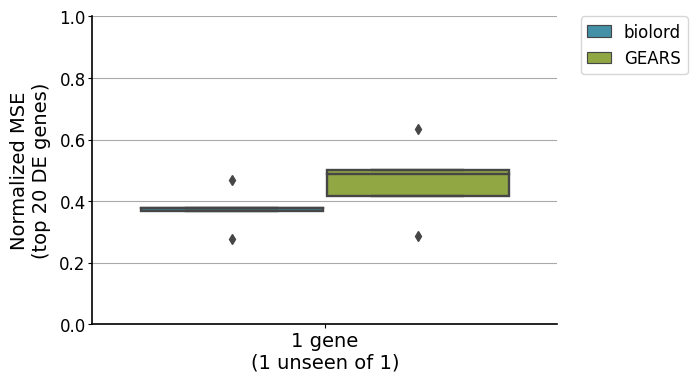

In [10]:
fig, axs = plt.subplots(1,1, figsize=(6,4))
sns.boxplot(data=df, #[df["test set"] != "1 gene\n(1 unseen of 1)"], 
            x="test set", 
            y="MSE 20 de genes",
            hue="method", 
            hue_order = ['biolord', 'GEARS'],
            palette= ["#339AB8", "#9AB833"],
            ax=axs
           )

axs.set_axisbelow(True)
axs.grid(".", color="darkgrey", axis="y")

x_labels = axs.get_xticklabels()
axs.set_xticklabels(x_labels, fontsize=14)
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Normalized MSE\n(top 20 DE genes)", fontsize=14)
axs.set_ylim(0,1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=True)
plt.savefig(FIG_DIR_LCL + "adamson_res.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
biolord_res.loc["mean"] = biolord_res.mean(0)
biolord_res

,unseen_single
mse_de_seed1,0.468040
mse_de_seed2,0.376397
mse_de_seed3,0.367184
mse_de_seed4,0.276424
mse_de_seed5,0.379262
mean,0.373461


In [12]:
gears_res.loc["mean"] = gears_res.mean(0)
gears_res

,combo_seen0,combo_seen1,combo_seen2,unseen_single
mse_de_seed1,NaN,NaN,NaN,0.633826
mse_de_seed2,NaN,NaN,NaN,0.500554
mse_de_seed3,NaN,NaN,NaN,0.489887
mse_de_seed4,NaN,NaN,NaN,0.285509
mse_de_seed5,NaN,NaN,NaN,0.417884
mean,NaN,NaN,NaN,0.465532
